In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

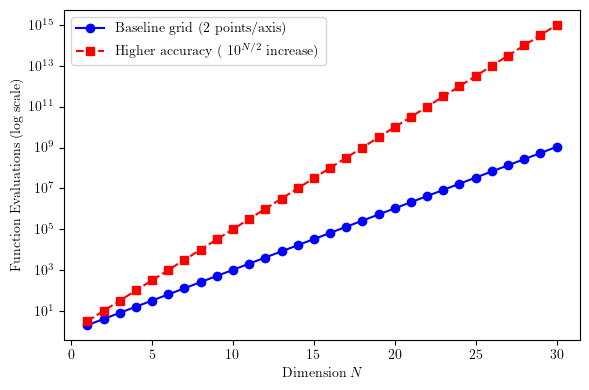

In [ ]:
dims = np.arange(1, 31)  # 1D ... 30D

cost_baseline = 2 ** dims

cost_high_accuracy = 10 ** (dims / 2)

plt.figure(figsize=(6,4))

plt.semilogy(dims, cost_baseline, marker='o', label='Baseline grid (2 points/axis)', color='blue')
plt.semilogy(dims, cost_high_accuracy, linestyle='--', marker='s',
             label='Higher accuracy (~10$^{N/2}$ increase)', color='red')

plt.xlabel('Dimension $N$')
plt.ylabel('Function Evaluations (log scale)')
# plt.title('Exponential cost of grid-based integration')
plt.legend()
plt.tight_layout()

# I don't actually use this figure in the book right now
# plt.savefig("../../../figs/monte_carlo/figure_curse_scaling.pdf", bbox_inches='tight')
plt.show()

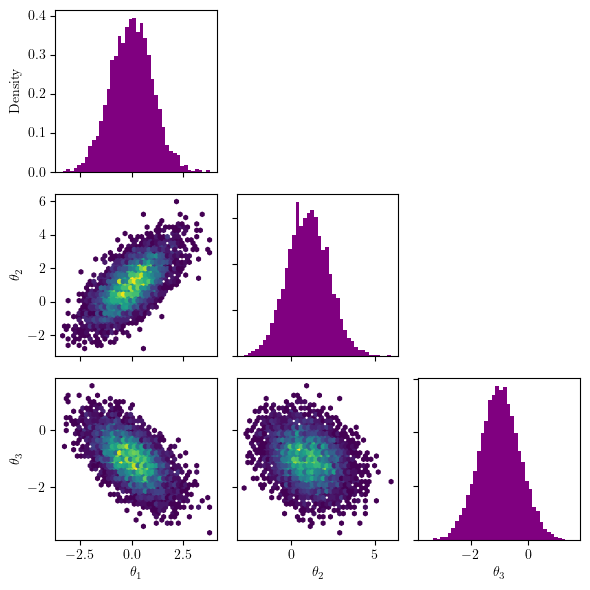

In [4]:
# correlated fake posterior samples
rng = np.random.default_rng(0)

means = np.array([0.0, 1.0, -1.0])
cov = np.array([
    [1.0,  0.8, -0.4],
    [0.8,  1.5, -0.2],
    [-0.4, -0.2, 0.5]
])

samples = rng.multivariate_normal(means, cov, size=5000)
param_names = [r'$\theta_1$', r'$\theta_2$', r'$\theta_3$']
n_params = len(param_names)

fig, axes = plt.subplots(n_params, n_params, figsize=(6,6))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

for i in range(n_params):
    for j in range(n_params):
        ax = axes[i, j]

        if i == j:
            # diagonal: 1D marginal histogram
            ax.hist(samples[:, j], bins=40, density=True, color='purple')
            ax.set_ylabel('Density' if j == 0 else '')
        else:
            # lower triangle: joint scatter / hexbin
            if i > j:
                ax.hexbin(samples[:, j], samples[:, i], gridsize=40, mincnt=1)
            else:
                # upper triangle: turn off / make empty
                ax.axis('off')
                continue

        # axis labels and ticks cleanup
        if i == n_params - 1:
            ax.set_xlabel(param_names[j])
        else:
            ax.set_xticklabels([])

        if j == 0 and i != 0:
            ax.set_ylabel(param_names[i])
        elif j != 0 and i != j:
            ax.set_yticklabels([])
        elif i == j and j != 0:
            ax.set_yticklabels([])

# fig.suptitle('Posterior marginals and joint correlations', y=0.93, fontsize=12)

plt.tight_layout()
plt.savefig("../../../figs/monte_carlo/figure_corner_plot.pdf", bbox_inches='tight')
plt.show()
